In [51]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Also, we only consider the first quadrant ($k_x,k_y\gt0$), and we can get the rest by symmetry.

In [52]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]
    
    fx = np.multiply(y,(X_b.dot(theta)))
    
    check = np.less(fx,np.ones(fx.shape))
    
    check = np.where(check==True,1,0)
    
    return check

def subgradient_descent(X,y,theta,iterations=100,X_test=None,y_test=None):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    
    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)
    hinge_history = np.zeros(iterations)
    acc_history = np.zeros(iterations)
    if X_test is not None:
      X_b_test = np.c_[np.ones((len(X_test),1)),X_test]
      hinge_history_test = np.zeros(iterations)
      acc_history_test = np.zeros(iterations)
      m_test = float(y_test.shape[0])


    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
          alpha/=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)
        hinge_history[it]  = (1/m) *hinge(X_b,y,theta)
        acc_history[it]  = 1-(1/m) *np.sum(check(X,y,theta))
        if X_test is not None:
          hinge_history_test[it]  = (1/m_test) *hinge(X_b_test,y_test,theta)
          acc_history_test[it]  = 1-(1/m_test) *np.sum(check(X_test,y_test,theta))
    if X_test is not None:    
      return theta, cost_history, theta_history, hinge_history, acc_history, hinge_history_test, acc_history_test
    else:
      return theta, cost_history, theta_history,hinge_history, acc_history

In [53]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):  
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):     
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta,iterations=1000):
        alpha=0.1
        I=int(iterations/20)
        for it in range(iterations):
            if it % I == -1:
              alpha/=2
            theta=theta-alpha*self.gradient(theta, x, y)
        self.w_ = theta[:,0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [54]:
N=30
N_test=200
mu=-2    #chemical potential

In [55]:
kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))

In [56]:
E=[float(-2*(np.cos(kx_list[i])+np.cos(ky_list[i]))) for i in range(N)]
#print(E)
occupancy=[E[i]<=mu for i in range(N)]
#print(occupancy)

In [57]:
kx_test=np.pi*np.array([np.random.random() for i in range(N_test)]).reshape((N_test,1))
ky_test=np.pi*np.array([np.random.random() for i in range(N_test)]).reshape((N_test,1))

In [58]:
E_test=[float(-2*(np.cos(kx_test[i])+np.cos(ky_test[i]))) for i in range(N_test)]
#print(E)
occupancy_test=[E_test[i]<=mu for i in range(N_test)]
#print(occupancy)

# SVM

In [59]:
y = np.where(occupancy,1.,-1.).reshape((N,1))
y_test = np.where(occupancy_test,1.,-1.).reshape((N_test,1))
#print(y)

Here we also include the second order term of $k_x$ and $k_y$ as features, as we need to approximate curve other than simple straight line.

In [60]:
X=np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]])
X=X.T
X_test=np.array([kx_test[:,0], ky_test[:,0], kx_test[:,0]**2, ky_test[:,0]**2,kx_test[:,0]*ky_test[:,0]])
X_test=X_test.T
theta = np.random.random((X.shape[1]+1,1))

In [61]:
n_iter = 1000
theta,cost_history,theta_history,hinge_history, acc_history, hinge_history_test, acc_history_test  = subgradient_descent(X,y,theta,n_iter,X_test,y_test)
print(theta)
print('Final Cost is :', cost_history[-1])
print('Final Hinge Cost is :', hinge_history[-1])
print('Final Hinge Cost for test sample is :', hinge_history_test[-1])
print('Final Accuracy is :', acc_history[-1])
print('Final Accuracy for test sample is :', acc_history_test[-1])

[[ 6.34701476]
 [-0.54457778]
 [-0.14807009]
 [-2.00020072]
 [-2.0658079 ]
 [-0.79286932]]
Final Cost is : 0.1535916115899119
Final Hinge Cost is : 0.0
Final Hinge Cost for test sample is : 0.04724057970151182
Final Accuracy is : 1.0
Final Accuracy for test sample is : 0.935


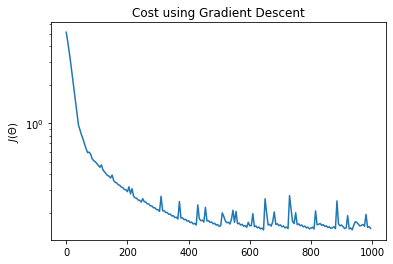

In [62]:
n=5
plt.plot(range(n_iter)[::n],cost_history[::n])
plt.ylabel("$J(\Theta)$")
plt.title("Cost using Gradient Descent")
plt.yscale('log')
plt.show()

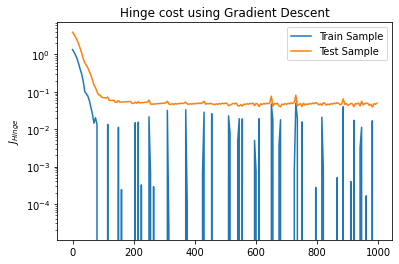

In [63]:
n=5
plt.plot(range(n_iter)[::n],hinge_history[::n],label='Train Sample')
plt.plot(range(n_iter)[::n],hinge_history_test[::n],label='Test Sample')
plt.ylabel("$J_{Hinge}$")
plt.title("Hinge cost using Gradient Descent")
plt.legend()
plt.yscale('log')
plt.show()

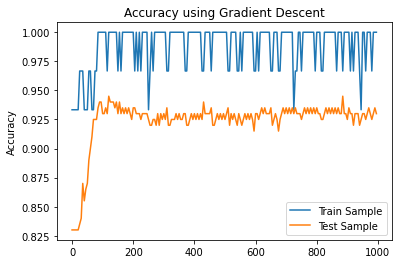

In [64]:
n=5
plt.plot(range(n_iter)[::n],acc_history[::n],label='Train Sample')
plt.plot(range(n_iter)[::n],acc_history_test[::n],label='Test Sample')
plt.ylabel("Accuracy")
plt.title("Accuracy using Gradient Descent")
plt.legend()
#plt.yscale('log')
plt.show()

<ipython-input-65-2ec651c6e8c7>:2: RuntimeWarning: invalid value encountered in arccos
  y_plot=np.arccos(-mu/2-np.cos(x_plot))


([<matplotlib.axis.YTick at 0x7fd0c264f0a0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

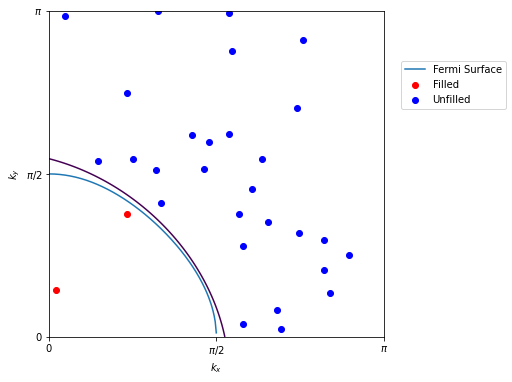

In [65]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)
plt.figure(figsize=(6,6))
plt.plot(x_plot,y_plot,label='Fermi Surface')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.contour(XX,YY, theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX**2+theta[4]*YY**2+theta[5]*XX*YY,[0])
plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

# Logistic Regression

In [66]:
y = np.where(occupancy,1.,0.).reshape((N,1))
y = np.array(y)
#print(y)
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((X_b.shape[1], 1))

In [67]:
n_itr=5000
model1 = LogisticRegressionUsingGD()
model1.fit(X_b, y, theta,n_itr)
accuracy = model1.accuracy(X_b, y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

The accuracy of the model is 100.0
The model parameters got by Gradient descent:
[ 4.00989102  0.28366753  1.54461716 -2.65376942 -2.83973593 -0.32856011]


<ipython-input-68-5973c73ca7b0>:2: RuntimeWarning: invalid value encountered in arccos
  y_plot=np.arccos(-mu/2-np.cos(x_plot))


([<matplotlib.axis.YTick at 0x7fd0c24880d0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

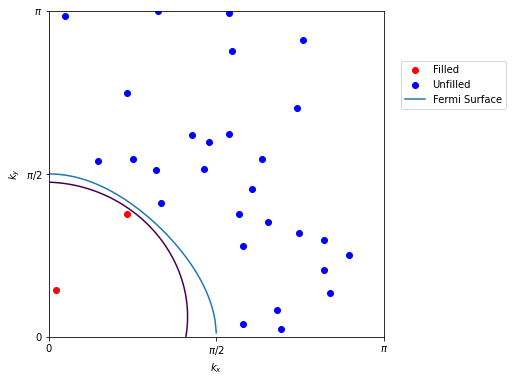

In [68]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)
plt.figure(figsize=(6,6))
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot,y_plot,label='Fermi Surface')
plt.contour(XX,YY, parameters[0]+parameters[1]*XX+parameters[2]*YY+parameters[3]*XX**2+parameters[4]*YY**2+parameters[5]*XX*YY,[0])
plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

# SVM_sym

In [69]:
y = np.where(occupancy,1.,-1.).reshape((N,1))
y_test = np.where(occupancy_test,1.,-1.).reshape((N_test,1))
#print(y)

Here we also include the second order term of $k_x$ and $k_y$ as features, as we need to approximate curve other than simple straight line.

In [70]:
X=np.array([kx_list[:,0]+ky_list[:,0], kx_list[:,0]**2+ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]])
X=X.T
X_test=np.array([kx_test[:,0]+ky_test[:,0], kx_test[:,0]**2+ky_test[:,0]**2,kx_test[:,0]*ky_test[:,0]])
X_test=X_test.T
theta = np.random.random((X.shape[1]+1,1))

In [71]:
n_iter = 1000
theta,cost_history,theta_history,hinge_history, acc_history, hinge_history_test, acc_history_test  = subgradient_descent(X,y,theta,n_iter,X_test,y_test)
print(theta)
print('Final Cost is :', cost_history[-1])
print('Final Hinge Cost is :', hinge_history[-1])
print('Final Hinge Cost for test sample is :', hinge_history_test[-1])
print('Final Accuracy is :', acc_history[-1])
print('Final Accuracy for test sample is :', acc_history_test[-1])

[[ 6.58705454]
 [-0.23312252]
 [-2.26739761]
 [-0.59655674]]
Final Cost is : 0.09252196593958524
Final Hinge Cost is : 0.0
Final Hinge Cost for test sample is : 0.04431349730187888
Final Accuracy is : 1.0
Final Accuracy for test sample is : 0.935


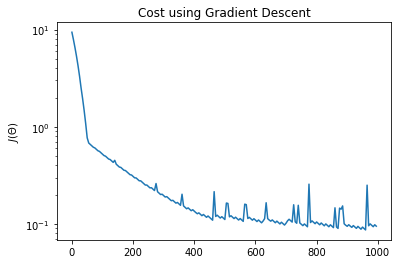

In [72]:
n=5
plt.plot(range(n_iter)[::n],cost_history[::n])
plt.ylabel("$J(\Theta)$")
plt.title("Cost using Gradient Descent")
plt.yscale('log')
plt.show()

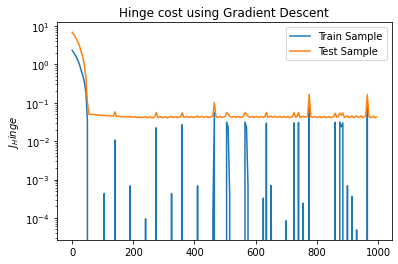

In [73]:
n=5
plt.plot(range(n_iter)[::n],hinge_history[::n],label='Train Sample')
plt.plot(range(n_iter)[::n],hinge_history_test[::n],label='Test Sample')
plt.ylabel("$J_Hinge$")
plt.title("Hinge cost using Gradient Descent")
plt.yscale('log')
plt.legend()
plt.show()

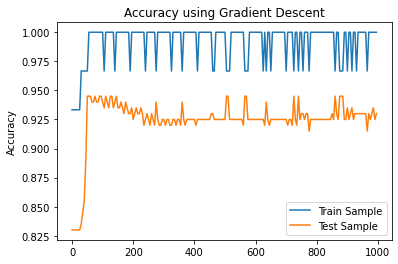

In [74]:
n=5
plt.plot(range(n_iter)[::n],acc_history[::n],label='Train Sample')
plt.plot(range(n_iter)[::n],acc_history_test[::n],label='Test Sample')
plt.ylabel("Accuracy")
plt.title("Accuracy using Gradient Descent")
plt.legend()
#plt.yscale('log')
plt.show()

<ipython-input-75-6aca153397d0>:2: RuntimeWarning: invalid value encountered in arccos
  y_plot=np.arccos(-mu/2-np.cos(x_plot))


([<matplotlib.axis.YTick at 0x7fd0c26f0cd0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, '$\\pi/2$'),
  Text(0, 3.141592653589793, '$\\pi$')])

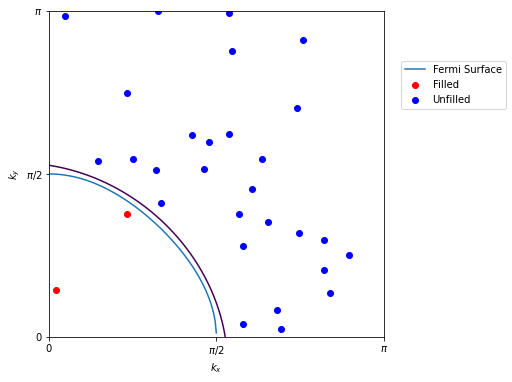

In [75]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)
plt.figure(figsize=(6,6))
plt.plot(x_plot,y_plot,label='Fermi Surface')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.contour(XX,YY, theta[0]+theta[1]*(XX+YY)+theta[2]*(XX**2+YY**2)+theta[3]*XX*YY,[0])
plt.legend(loc=(1.05,0.7))
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])